In [1]:
import distl
import numpy as np

# Multivariate Gaussian

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['a', 'b', 'c'])

In [3]:
mvg.sample()

array([ 5.28918573, 11.21208674, 12.92290101])

In [4]:
mvg.sample(size=5)

array([[ 5.69256978, 12.65094467, 13.95837489],
       [ 5.48324556,  8.00583062,  9.52258506],
       [ 4.04494092,  7.86700014, 10.82205921],
       [ 2.41793021,  8.99122719, 13.57329698],
       [ 2.67232714, 10.60534095, 14.9330138 ]])

and plotting will now show a corner plot (if [corner](https://corner.readthedocs.io/en/latest/) is installed)

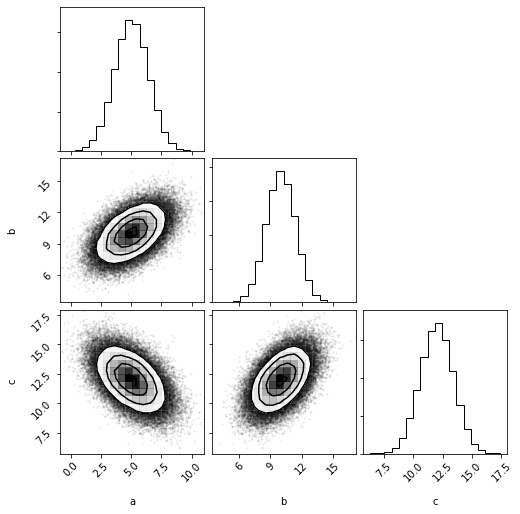

In [5]:
fig = mvg.plot(show=True)

# Multivariate Histogram

we can now convert this multivariate gaussian distribution into a [multivariate histogram](../api/MVHistogram.md) distribution (alternatively we could create a histogram directly from a set of samples or chains via [mvhistogram_from_data](../api/distl.mvhistogram_from_data.md).

In [6]:
mvh = mvg.to_mvhistogram(bins=15)

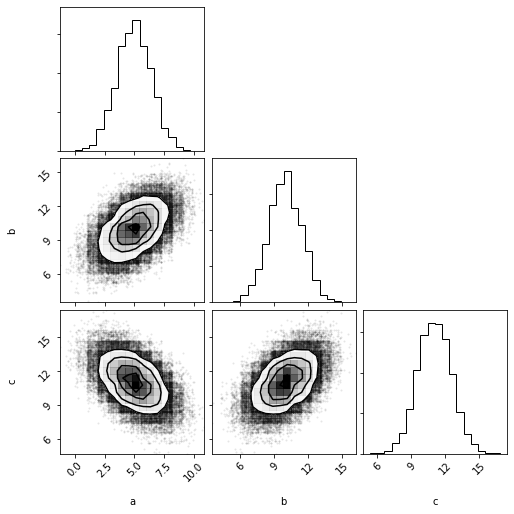

In [7]:
fig = mvh.plot(show=True, size=1e6)

In [8]:
np.asarray(mvh.density.shape)

array([15, 15, 15])

Now if we access the means and covariances, we'll see that they are slightly different due to the binning.

In [9]:
mvh.calculate_means()

array([ 4.97142828,  9.97154187, 11.05755981])

In [10]:
mvh.calculate_covariances()

array([[ 2.12439248,  0.99252033, -0.99530192],
       [ 0.99252033,  2.12913431,  1.00080292],
       [-0.99530192,  1.00080292,  2.1276206 ]])

If we convert back to a multivariate gaussian, these are the means and covariances that will be adopted (technically not exactly as they'll be recomputed from another sampling of the underlying distribution).

In [11]:
mvhg = mvh.to_mvgaussian()

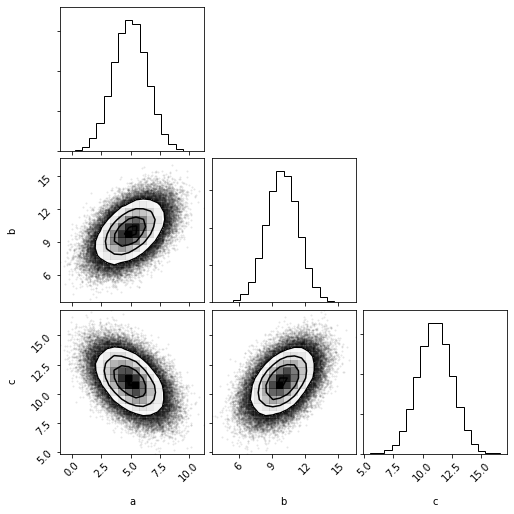

In [12]:
fig = mvhg.plot(show=True)

In [13]:
mvhg.mean

array([ 4.96348824,  9.96372407, 11.06157606])

In [14]:
mvhg.cov

array([[ 2.14968705,  1.0014201 , -1.01230489],
       [ 1.0014201 ,  2.11435132,  0.98121077],
       [-1.01230489,  0.98121077,  2.12815416]])